# **Data process**

## Đổi tên các cột concat()

In [1]:
import pandas as pd

anno_df = pd.read_csv('/kaggle/input/project2-cs114-data/wecode.data/annonimized.csv')

anno_df.rename(columns={
    "concat('it001',`assignment_id`)": 'a_id',
    "concat('it001',`problem_id`)": 'p_id',
    "concat('it001', username)": 'username',
    "concat('it001',`language_id`)": 'lang_id',
}, inplace=True)

anno_df.head()

,a_id,p_id,username,is_final,status,pre_score,coefficient,lang_id,created_at,updated_at,judgement
0,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:02:04,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
1,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:04:41,10-09 08:04:51,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
2,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:06:49,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
3,90ce27571176d87961b565d5ef4b3de33ede04ac,bf96fbdc5f499538c3e2bfbec5779c8a14b0a9ff,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:47:52,10-09 08:48:01,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
4,90ce27571176d87961b565d5ef4b3de33ede04ac,7a6e5ca470ff47c3b5048f240c4738de71010c78,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 09:19:35,10-09 09:19:45,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."


## Xử lí judgement

In [2]:
import json

def safe_parse_judgement(j):
    try:
        data = json.loads(j)
        return pd.Series({
            'times': data.get('times', []),
            'mems': data.get('mems', []),
            'verdicts': data.get('verdicts', {})
        })
    except:
        return pd.Series({'times': [], 'mems': [], 'verdicts': {}})
        
# Giả sử df là DataFrame bạn đang dùng, với cột 'judgement' là chuỗi JSON
# Chuyển cột 'judgement' thành dict
anno_df[['times', 'mems', 'verdicts']] = anno_df['judgement'].apply(safe_parse_judgement)
anno_df.drop('judgement', axis=1, inplace=True)
anno_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295198 entries, 0 to 295197
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   a_id         295198 non-null  object
 1   p_id         295198 non-null  object
 2   username     295198 non-null  object
 3   is_final     295198 non-null  int64 
 4   status       295198 non-null  object
 5   pre_score    295198 non-null  int64 
 6   coefficient  295198 non-null  int64 
 7   lang_id      295198 non-null  object
 8   created_at   295198 non-null  object
 9   updated_at   295198 non-null  object
 10  times        295198 non-null  object
 11  mems         295198 non-null  object
 12  verdicts     295198 non-null  object
dtypes: int64(3), object(10)
memory usage: 29.3+ MB


# **Trích xuất đặc trưng sinh viên**

## Số lần submit ứng với user

In [3]:
num_submit= anno_df['username'].value_counts()
num_submit_df = num_submit.reset_index()
num_submit_df.columns = ['username', 'num_submit']

num_submit_df

,username,num_submit
0,9f605b4802c811805adc38ae19035ded09a5e4b5,1047
1,2cd5132c3c49bd9d4d5081e386a4d69a593f850a,1022
2,58f61331a385caeed17baaf54abea308426d50fe,833
3,1abf62f1e76bc5ac164061cff2a8171d6b6de657,749
4,33b16210a7736a6f75ef1b1f3cb7070a4d29395e,745
...,...,...
1484,761459daa69061bdf66d850ebf8877f0c84e48ae,1
1485,c4f595ca17b4c13287b0beec0dbd45d0e356055b,1
1486,987888aba1d68d84a51fcfef4131d649024e0aec,1
1487,713487f0de26590bca3c759e2fef02b3a5bad9fd,1


## Số problem hoàn thành

In [4]:
# num_completed_problems = anno_df[anno_df['is_final'] == 1].groupby('username')['p_id'].nunique().reset_index(name='num_completed_problems')

# num_completed_problems

num_completed_problems = (
    anno_df[anno_df['pre_score'] == 10000]
    .drop_duplicates(subset=['username', 'p_id'])
    .groupby('username')
    .size()
    .reset_index(name='num_completed_problems')
)

num_completed_problems

,username,num_completed_problems
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,46
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,72
2,01122b3ef7e59b84189e65985305f575d6bdf83c,58
3,0134f9f410c65ad0e8c2254a7e9288670e02a183,47
4,013de369c439ab0ead8aa7da64423aa395a8be39,44
...,...,...
1444,feb8a2859a011c59efd22ed419cb69288fe03627,34
1445,fef4a3263ed9a8ab14d457694bb8fd86ccd98312,74
1446,ff12d6e2ab80696ed8e22fbe5497e96c68d29076,99
1447,ff3fa2ec64294f37ae968159f810ebeda7966c51,30


## Số problem hoàn thành trễ

In [5]:
num_late_submit = (
    anno_df[(anno_df['coefficient'] < 100) & (anno_df['pre_score'] == 10000)]
    .drop_duplicates(subset=['username', 'p_id'])
    .groupby('username')
    .size()
    .reset_index(name='num_late_submit')
)

num_late_submit

,username,num_late_submit
0,0155f91fe242fe55e1af631b0f0afbe9938b185c,1
1,052039d5c5915699359b1d549b36ea69330c0ac3,1
2,05b134c1a682085880fb7ce76d221a48955e5b8a,2
3,0a9b6ec3e82e8a2527b21eb3420a6d9b72f4f71e,9
4,0aad9682c3c4280eb05dbd27e6cab55f4b1ae4b4,1
...,...,...
91,f7875ec1207504a229cd9b5ca132437c6bdd6a4d,2
92,f86b9fba1d59be7c864d4f23d0c7674113a27cab,2
93,f9491b0ab4aee90c428545e0e315a3af1f827595,2
94,f9f4d4ef2a3de006bd037db9eb160ab8e51c79f2,9


## Trung bình pre_score và coefficient

In [6]:
mean_scores = anno_df.groupby('username')[['pre_score', 'coefficient']].mean().reset_index()
mean_scores

,username,pre_score,coefficient
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,5504.149660,100.000000
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,5488.552124,100.000000
2,01122b3ef7e59b84189e65985305f575d6bdf83c,5973.753846,100.000000
3,0134f9f410c65ad0e8c2254a7e9288670e02a183,5952.760000,100.000000
4,013de369c439ab0ead8aa7da64423aa395a8be39,6474.448598,97.196262
...,...,...,...
1484,feb8a2859a011c59efd22ed419cb69288fe03627,5581.081081,100.000000
1485,fef4a3263ed9a8ab14d457694bb8fd86ccd98312,6204.557692,100.000000
1486,ff12d6e2ab80696ed8e22fbe5497e96c68d29076,4998.466819,100.000000
1487,ff3fa2ec64294f37ae968159f810ebeda7966c51,4343.329787,100.000000


## Số bài khó hoàn thành

In [7]:
completed = (
    anno_df[anno_df['pre_score'] == 10000]
    .drop_duplicates(subset=['username', 'a_id', 'p_id'])
)

total_users_per_aid = (
    anno_df[['username', 'a_id']]
    .drop_duplicates()
    .groupby('a_id')
    .size()
    .reset_index(name='total_users')
)

num_completed_per_problem = (
    completed.groupby(['a_id', 'p_id'])['username']
    .nunique()
    .reset_index(name='num_users_completed')
)

completion_rate_df = num_completed_per_problem.merge(total_users_per_aid, on='a_id')
completion_rate_df['completion_rate'] = completion_rate_df['num_users_completed'] / completion_rate_df['total_users']

In [8]:
def classify_difficulty(rate):
    if rate >= 0.8:
        return 'easy'
    elif rate >= 0.3:
        return 'medium'
    else:
        return 'hard'

completion_rate_df['difficulty'] = completion_rate_df['completion_rate'].apply(classify_difficulty)

completed_with_difficulty = completed.merge(
    completion_rate_df[['a_id', 'p_id', 'difficulty']],
    on=['a_id', 'p_id'],
    how='left'
)

num_submit_dif = (
    completed_with_difficulty
    .groupby(['username', 'difficulty'])
    .size()
    .unstack(fill_value=0)
    .reset_index()
)

# Đảm bảo đủ 3 cột
for col in ['easy', 'medium', 'hard']:
    if col not in num_submit_dif.columns:
        num_submit_dif[col] = 0

num_submit_dif

difficulty,username,easy,hard,medium
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,35,0,12
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,60,0,12
2,01122b3ef7e59b84189e65985305f575d6bdf83c,31,13,15
3,0134f9f410c65ad0e8c2254a7e9288670e02a183,34,0,13
4,013de369c439ab0ead8aa7da64423aa395a8be39,45,0,13
...,...,...,...,...
1444,feb8a2859a011c59efd22ed419cb69288fe03627,30,0,4
1445,fef4a3263ed9a8ab14d457694bb8fd86ccd98312,67,5,3
1446,ff12d6e2ab80696ed8e22fbe5497e96c68d29076,102,0,0
1447,ff3fa2ec64294f37ae968159f810ebeda7966c51,26,1,3


## Merge các đặc trưng đã trích xuất

In [9]:
summary_df = num_submit_df \
    .merge(num_completed_problems, on='username', how='left') \
    .merge(num_late_submit, on='username', how='left') \
    .merge(mean_scores, on='username', how='left') \
    .merge(num_submit_dif, on='username', how='left')

summary_df = summary_df.fillna(0)

summary_df[['num_submit', 'num_completed_problems', 'num_late_submit', 'easy', 'medium', 'hard']] = summary_df[[
    'num_submit', 'num_completed_problems', 'num_late_submit', 'easy', 'medium', 'hard']].astype(int)

summary_df

,username,num_submit,num_completed_problems,num_late_submit,pre_score,coefficient,easy,hard,medium
0,9f605b4802c811805adc38ae19035ded09a5e4b5,1047,86,0,3071.882521,100.0,66,2,18
1,2cd5132c3c49bd9d4d5081e386a4d69a593f850a,1022,100,0,4413.339530,100.0,67,3,32
2,58f61331a385caeed17baaf54abea308426d50fe,833,109,0,2771.621849,100.0,103,0,6
3,1abf62f1e76bc5ac164061cff2a8171d6b6de657,749,100,0,2747.838451,100.0,97,1,11
4,33b16210a7736a6f75ef1b1f3cb7070a4d29395e,745,88,0,3870.371812,100.0,74,5,12
...,...,...,...,...,...,...,...,...,...
1484,761459daa69061bdf66d850ebf8877f0c84e48ae,1,0,0,0.000000,100.0,0,0,0
1485,c4f595ca17b4c13287b0beec0dbd45d0e356055b,1,0,0,0.000000,100.0,0,0,0
1486,987888aba1d68d84a51fcfef4131d649024e0aec,1,1,0,10000.000000,100.0,0,1,0
1487,713487f0de26590bca3c759e2fef02b3a5bad9fd,1,1,0,10000.000000,100.0,0,1,0


# **Data thực hành**

## Xử lí data thực hành

In [10]:
th_df = pd.read_csv('/kaggle/input/project2-cs114-data/wecode.data/th-public.csv')
th_df.dropna(inplace=True)
th_df.rename(columns={'hash' : 'username'}, inplace=True)
th_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 755 entries, 0 to 760
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   username  755 non-null    object
 1   TH        755 non-null    object
dtypes: object(2)
memory usage: 17.7+ KB


## Merge với dataframe feature

(Note : Cảm giác mean_prescore và coefficient không có tác dụng)

In [11]:
th_df = summary_df.merge(th_df, on='username', how='inner')

th_df

,username,num_submit,num_completed_problems,num_late_submit,pre_score,coefficient,easy,hard,medium,TH
0,2cd5132c3c49bd9d4d5081e386a4d69a593f850a,1022,100,0,4413.339530,100.0,67,3,32,8
1,58f61331a385caeed17baaf54abea308426d50fe,833,109,0,2771.621849,100.0,103,0,6,8
2,1abf62f1e76bc5ac164061cff2a8171d6b6de657,749,100,0,2747.838451,100.0,97,1,11,5
3,33b16210a7736a6f75ef1b1f3cb7070a4d29395e,745,88,0,3870.371812,100.0,74,5,12,5
4,45e8b53fe4fc590dd9c7564fe2c6fa3ede58fbea,738,110,0,3604.070461,100.0,85,0,26,9.5
...,...,...,...,...,...,...,...,...,...,...
750,63b684c9976d06a32dbcdc4685592cd713f9121e,1,0,0,6857.000000,100.0,0,0,0,9
751,503affec12fb99997f583ed73b60262572694795,1,1,0,10000.000000,100.0,0,1,0,5
752,4644e181d653c04f17f76eed400fdf52a43b2237,1,0,0,0.000000,100.0,0,0,0,8
753,761459daa69061bdf66d850ebf8877f0c84e48ae,1,0,0,0.000000,100.0,0,0,0,1.5


In [12]:
print(th_df['TH'].value_counts())

print(th_df['TH'].astype(str).unique())

TH
8      94
9      93
9.5    86
8.5    67
10     64
5      61
7.5    50
6.5    38
7      37
4.5    32
6      31
5.5    29
4      18
3.5    12
2.5    11
3      10
1.5     8
1       7
2       3
0.5     2
        2
Name: count, dtype: int64
['8' '5' '9.5' '8.5' '9' '10' '5.5' '7.5' '6.5' '7' '4.5' '4' '6' '3.5'
 '1.5' '2.5' '3' '0.5' '1' '2' '\xa0']


In [ ]:
th_df['TH_clean'] = th_df['TH'].astype(str).str.replace('\xa0', '', regex=False).str.strip()

th_df = th_df[th_df['TH_clean'] != '']

th_df = th_df.drop(columns=['TH_clean'])

th_df['TH'] = pd.to_numeric(th_df['TH'], errors='coerce')

th_df

,username,num_submit,num_completed_problems,num_late_submit,pre_score,coefficient,easy,hard,medium,TH
0,2cd5132c3c49bd9d4d5081e386a4d69a593f850a,1022,100,0,4413.339530,100.0,67,3,32,8.0
1,58f61331a385caeed17baaf54abea308426d50fe,833,109,0,2771.621849,100.0,103,0,6,8.0
2,1abf62f1e76bc5ac164061cff2a8171d6b6de657,749,100,0,2747.838451,100.0,97,1,11,5.0
3,33b16210a7736a6f75ef1b1f3cb7070a4d29395e,745,88,0,3870.371812,100.0,74,5,12,5.0
4,45e8b53fe4fc590dd9c7564fe2c6fa3ede58fbea,738,110,0,3604.070461,100.0,85,0,26,9.5
...,...,...,...,...,...,...,...,...,...,...
750,63b684c9976d06a32dbcdc4685592cd713f9121e,1,0,0,6857.000000,100.0,0,0,0,9.0
751,503affec12fb99997f583ed73b60262572694795,1,1,0,10000.000000,100.0,0,1,0,5.0
752,4644e181d653c04f17f76eed400fdf52a43b2237,1,0,0,0.000000,100.0,0,0,0,8.0
753,761459daa69061bdf66d850ebf8877f0c84e48ae,1,0,0,0.000000,100.0,0,0,0,1.5


In [14]:
th_df['TH'] = th_df['TH'].astype(float)

## Chọn feature (Feature selection : Pearson Coefficient)

In [ ]:
numeric_cols = th_df.select_dtypes(include='number').columns

correlations = th_df[numeric_cols].corr(method='pearson')

th_corr = correlations['TH'].drop('TH') 

In [16]:
th_corr_sorted = th_corr.sort_values(ascending=False)
print(th_corr_sorted)

medium                    0.384898
num_completed_problems    0.366976
num_submit                0.331316
easy                      0.295951
hard                      0.229922
pre_score                 0.187059
num_late_submit           0.089522
coefficient              -0.124541
Name: TH, dtype: float64


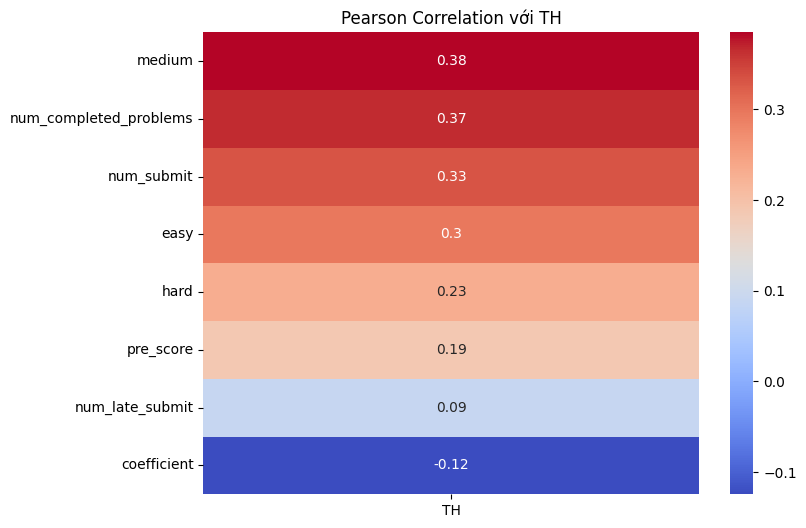

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(th_corr_sorted.to_frame(), annot=True, cmap='coolwarm')
plt.title('Pearson Correlation với TH')
plt.show()

In [18]:
chosen_feature = ['username', 'num_completed_problems', 'num_submit', 'easy', 'medium', 'hard', 'TH']

th_df = th_df[chosen_feature]

th_df

,username,num_completed_problems,num_submit,easy,medium,hard,TH
0,2cd5132c3c49bd9d4d5081e386a4d69a593f850a,100,1022,67,32,3,8.0
1,58f61331a385caeed17baaf54abea308426d50fe,109,833,103,6,0,8.0
2,1abf62f1e76bc5ac164061cff2a8171d6b6de657,100,749,97,11,1,5.0
3,33b16210a7736a6f75ef1b1f3cb7070a4d29395e,88,745,74,12,5,5.0
4,45e8b53fe4fc590dd9c7564fe2c6fa3ede58fbea,110,738,85,26,0,9.5
...,...,...,...,...,...,...,...
750,63b684c9976d06a32dbcdc4685592cd713f9121e,0,1,0,0,0,9.0
751,503affec12fb99997f583ed73b60262572694795,1,1,0,0,1,5.0
752,4644e181d653c04f17f76eed400fdf52a43b2237,0,1,0,0,0,8.0
753,761459daa69061bdf66d850ebf8877f0c84e48ae,0,1,0,0,0,1.5


## Chuẩn hóa bằng Standard Normalization (không cần nếu dùng XGboost, Catboost)

# **Modeling**

## Chuẩn bị dữ liệu train, test

In [ ]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

features = ['num_completed_problems', 'num_submit', 'easy', 'medium', 'hard']
target = 'TH'

X = th_df[features]
y = th_df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## CatBoost

In [ ]:
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV

model = CatBoostRegressor(verbose=0, random_state=42)

param_grid = {
    'iterations': [50, 100, 300, 500],
    'depth': [4, 6, 8, 10, 12],
    'learning_rate': [0.001, 0.01, 0.05, 0.1],
    'l2_leaf_reg': [1, 3, 5, 7, 9]
}

# param_grid = {
#     'iterations': [100],
#     'depth': [8],
#     'learning_rate': [0.1],
#     'l2_leaf_reg': [7]
# }

# Tạo GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           scoring='r2', cv=5, n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best R² score (validation):", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
print("Test RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("Test R² score:", r2_score(y_test, y_pred))

Fitting 5 folds for each of 400 candidates, totalling 2000 fits
Best parameters: {'depth': 8, 'iterations': 100, 'l2_leaf_reg': 7, 'learning_rate': 0.1}
Best R² score (validation): 0.30903964512867454
Test RMSE: 1.946369187378512
Test R² score: 0.29035879542102405


In [ ]:
summary_features = summary_df[features]

summary_df['predicted_TH'] = best_model.predict(summary_features)

print(summary_df[['username', 'predicted_TH']].head())

                                   username  predicted_TH
0  9f605b4802c811805adc38ae19035ded09a5e4b5      7.857401
1  2cd5132c3c49bd9d4d5081e386a4d69a593f850a      8.248230
2  58f61331a385caeed17baaf54abea308426d50fe      7.806940
3  1abf62f1e76bc5ac164061cff2a8171d6b6de657      6.208408
4  33b16210a7736a6f75ef1b1f3cb7070a4d29395e      7.321178


In [ ]:
summary_df[['username', 'predicted_TH']].to_csv(
    'catboost_predict.txt', index=False, header=False
)

## XGBoost

In [24]:
summary_df.drop('predicted_TH', axis=1)

,username,num_submit,num_completed_problems,num_late_submit,pre_score,coefficient,easy,hard,medium
0,9f605b4802c811805adc38ae19035ded09a5e4b5,1047,86,0,3071.882521,100.0,66,2,18
1,2cd5132c3c49bd9d4d5081e386a4d69a593f850a,1022,100,0,4413.339530,100.0,67,3,32
2,58f61331a385caeed17baaf54abea308426d50fe,833,109,0,2771.621849,100.0,103,0,6
3,1abf62f1e76bc5ac164061cff2a8171d6b6de657,749,100,0,2747.838451,100.0,97,1,11
4,33b16210a7736a6f75ef1b1f3cb7070a4d29395e,745,88,0,3870.371812,100.0,74,5,12
...,...,...,...,...,...,...,...,...,...
1484,761459daa69061bdf66d850ebf8877f0c84e48ae,1,0,0,0.000000,100.0,0,0,0
1485,c4f595ca17b4c13287b0beec0dbd45d0e356055b,1,0,0,0.000000,100.0,0,0,0
1486,987888aba1d68d84a51fcfef4131d649024e0aec,1,1,0,10000.000000,100.0,0,1,0
1487,713487f0de26590bca3c759e2fef02b3a5bad9fd,1,1,0,10000.000000,100.0,0,1,0


In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

model = XGBRegressor(random_state=42, verbosity=0)

param_grid = {
    'n_estimators': [20, 50, 100, 200, 300],
    'max_depth': [1, 3, 5, 7, 9],
    'learning_rate': [0.001, 0.01, 0.05, 0.1],
    'subsample': [0.4, 0.6, 0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}


grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           scoring='r2',
                           cv=5,
                           n_jobs=-1,
                           verbose=1)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation R²:", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(f"Test RMSE: {rmse}")
print(f"Test R² score: {r2}")


Fitting 5 folds for each of 800 candidates, totalling 4000 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Best cross-validation R²: 0.30411886658059306
Test RMSE: 1.9509954791458226
Test R² score: 0.2869813180690165


In [ ]:
summary_features = summary_df[features]

summary_df['predicted_TH'] = best_model.predict(summary_features)

print(summary_df[['username', 'predicted_TH']].head())

                                   username  predicted_TH
0  9f605b4802c811805adc38ae19035ded09a5e4b5      8.244403
1  2cd5132c3c49bd9d4d5081e386a4d69a593f850a      8.513774
2  58f61331a385caeed17baaf54abea308426d50fe      8.102885
3  1abf62f1e76bc5ac164061cff2a8171d6b6de657      6.353748
4  33b16210a7736a6f75ef1b1f3cb7070a4d29395e      7.812975


In [ ]:
summary_df[['username', 'predicted_TH']].to_csv(
    'xgboost_predict.txt', index=False, header=False
)